In [1]:
import pandas as pd
import numpy as np

In [2]:
# Show dataset and create an index
suicide_df = pd.read_csv('master.csv', index_col='country')
suicide_df.head()

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
country,,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
suicide_df.columns

Index(['year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
# Rename columns as some are misformatted
suicide_df.rename(columns={' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace=True)
suicide_df.columns

Index(['year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
# Remove columns we don't need or will use in our analysis
suicide_df = suicide_df.drop(columns=['country-year','HDI for year'])

In [6]:
suicide_df.head()

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
country,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [7]:
# Normalize and change 'gdp_per_capita ($)' column into an integer dtype
suicide_df['gdp_for_year ($)'] = suicide_df['gdp_for_year ($)'].str.replace(',','')
suicide_df['gdp_for_year ($)'] = suicide_df['gdp_for_year ($)'].astype(int)

OverflowError: Python int too large to convert to C long

In [8]:
suicide_df.dtypes

year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
gdp_for_year ($)       object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [9]:
# Check for null values in the dataset
def num_missing(x):
    return sum(x.isnull())
# Apply Per Column
print ("Missing values per column:")
print (suicide_df.apply(num_missing, axis=0))

Missing values per column:
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
gdp_for_year ($)      0
gdp_per_capita ($)    0
generation            0
dtype: int64


In [10]:
# Suicide_df is pretty clean

In [11]:
# Start of high-level analysis
# Show number of suicides in each country
suicide_no_dataframe = suicide_df.pivot_table(values='suicides_no', index='country', aggfunc='sum')

In [29]:
# Show population of each country
suicide_pop_dataframe = suicide_df.pivot_table(values='population', index='country', aggfunc='sum')
suicide_pop_dataframe

,population
country,
Albania,62325467
Antigua and Barbuda,1990228
Argentina,1035985431
Armenia,77348173
Aruba,1259677
Australia,542377786
Austria,243853094
Azerbaijan,111790300
Bahamas,6557048


In [30]:
# Create dataframe with population and suicide count
suicide_num_pop = suicide_no_dataframe.join(suicide_pop_dataframe)
suicide_num_pop

,suicides_no,population
country,,
Albania,1970,62325467
Antigua and Barbuda,11,1990228
Argentina,82219,1035985431
Armenia,1905,77348173
Aruba,101,1259677
Australia,70111,542377786
Austria,50073,243853094
Azerbaijan,1656,111790300
Bahamas,93,6557048


In [14]:
# Divide suicide count column with population
suicide_num_pop['percentage'] = (suicide_num_pop['suicides_no']/suicide_num_pop['population'])

In [15]:
# Multiply percentage column by 100
suicide_series_percent = suicide_num_pop['percentage'].apply(lambda x: x *100)

In [31]:
# Create new dataframe showing percentage total of suicdes per each country's population
suicide_frame_percent = suicide_series_percent.to_frame()
suicide_frame_percent = suicide_frame_percent.rename(columns={'percentage':'Percentage of Suicide'})
suicide_frame_percent

,Percentage of Suicide
country,
Albania,0.003161
Antigua and Barbuda,0.000553
Argentina,0.007936
Armenia,0.002463
Aruba,0.008018
Australia,0.012927
Austria,0.020534
Azerbaijan,0.001481
Bahamas,0.001418


In [17]:
suicide_num_pop = suicide_frame_percent.join(suicide_num_pop)

In [18]:
# Drop unecessary 'percentage' column
suicide_percentage_analysis = suicide_num_pop.drop(columns='percentage')

In [33]:
# Show brief description of percentage total
suicide_percentage_analysis['Percentage of Suicide'].describe()

count    101.000000
mean       0.011010
std        0.008728
min        0.000000
25%        0.004008
50%        0.008162
75%        0.015689
max        0.041182
Name: Percentage of Suicide, dtype: float64

In [20]:
suicide_percentage_analysis = suicide_percentage_analysis.sort_values(by=['Percentage of Suicide'], ascending=False)

In [21]:
suicide_percentage_analysis.to_csv('Suicide_Percentage_Breakdown.csv', index=True)

In [22]:
# Analyze Suicide Rates over time per Country

In [23]:
# Select the columns you want
suicide_overtime_df = suicide_df.drop(columns=['sex', 'age', 'population', 'suicides/100k pop', 'gdp_for_year ($)','gdp_per_capita ($)', 'generation'])

In [24]:
# Set Datetime index
suicide_overtime_df['year'] = pd.to_datetime(suicide_overtime_df['year'], format='%Y')

In [34]:
# Create pivot-table showing yearly suicide number per country
suicide_overtime_df = suicide_overtime_df.pivot_table(values='suicides_no', index='year', aggfunc='sum')
suicide_overtime_df

,suicides_no
year,
1985-01-01,116063
1986-01-01,120670
1987-01-01,126842
1988-01-01,121026
1989-01-01,160244
1990-01-01,193361
1991-01-01,198020
1992-01-01,211473
1993-01-01,221565


In [26]:
suicide_overtime_df = suicide_overtime_df[suicide_overtime_df.suicides_no != 15603]

In [27]:
import matplotlib.pyplot as plt

C:\Users\hayde\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


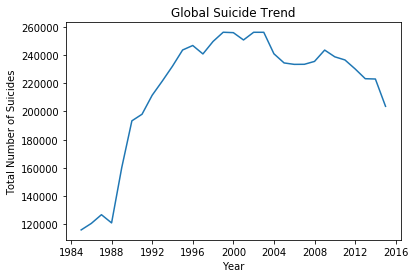

In [28]:
plt.plot(suicide_overtime_df.index.values, suicide_overtime_df['suicides_no'])
plt.xlabel('Year')
plt.ylabel('Total Number of Suicides')
plt.title('Global Suicide Trend')
plt.show()